In [1]:
from sklearn import datasets
import numpy as np

In [2]:
# Loads the iris data into jupyer's memory.
iris = datasets.load_iris()
y = iris.target

In [3]:
# Here, we will standardize the features using the StandardScaler class 
# from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# To evaluate how well a trained model performs on unseen data, 
# we will further split the dataset into separate training and 
# test datasets
from sklearn.model_selection import train_test_split

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
    resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score


@ignore_warnings(category=ConvergenceWarning)
def train_smv_model(X, y, C, gamma, kernel='rbf', show_graph=False,max_iter_n=100, feature_names=None):
    """Train the SVM model and graphing the data.
        And tesing its prediction via accuracy score.
    ----------
    X : array-like, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y : array-like, shape = [n_samples]
        n_sample target values.
    
    feature_names : array shape = [n_feature_names] A list of feature names
    
    C : Float Inverse of regularization strength; must be a positive float. 
        Like in support vector machines, smaller values specify stronger regularization.
        
    gamma : float, gamma parameter for the SVM model.
    
    kernel : String, the type of kernel to passed in the SVM.
    
    show_graph : boolean if true graph will be displayed.
        
    max_iter_n : max number of iterations for training the model.
    
    Return 
        (float) accuracy of SVM model.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)

    sc = StandardScaler()
    sc.fit(X_train)

    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    svm = SVC(kernel=kernel, random_state=1, gamma=gamma, C=C)
    svm.fit(X_train_std, y_train)
    
    
    if show_graph and feature_names is not None:
        plot_decision_regions(X_combined_std, 
                              y_combined,
                              classifier=svm, 
                              test_idx=range(105, 150))


        plt.xlabel(feature_names[0] + ' [standardized]')
        plt.ylabel(feature_names[1] + ' [standardized]')
        plt.legend(loc='upper left')
        plt.show()
        
    y_pred = svm.predict(X_test_std)
    return accuracy_score(y_test, y_pred)


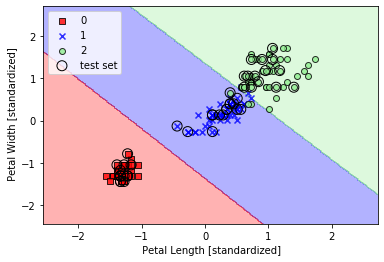

Accuracy: 0.98


In [6]:
X = iris.data[:, [2, 3]]
accuracy = train_smv_model(X=X,y=y,
                           feature_names=[' Petal Length', ' Petal Width'],
                           C=1.0, gamma=0.2, kernel='linear', show_graph=True)

print('Accuracy: %.2f' % accuracy)

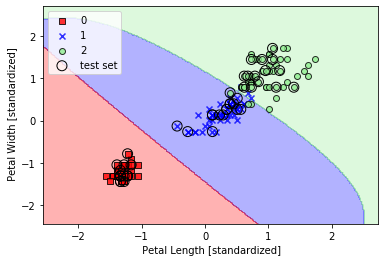

Accuracy: 0.98


In [7]:
# To solve a nonlinear problem using an SVM, we would transform the training data
# onto a higher-dimensional feature space via a mapping function and train a linear
# SVM model to classify the data in this new feature space. Then, we can use the same
# mapping function to transform new, unseen data to classify it using the linear
# SVM model.

feature_names = [' Sepal Length', ' Sepal Width', ' Petal Length', ' Petal Width']
X = iris.data[:, [2, 3]]
accuracy = train_smv_model(X=X,y=y,
                           feature_names=[' Petal Length', ' Petal Width'],
                           C=1.0, gamma=0.2, kernel='rbf', show_graph=True)

print('Accuracy: %.2f' % accuracy)

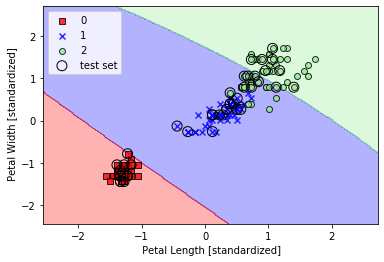

Accuracy: 0.82


In [8]:
X = iris.data[:, [2, 3]]
accuracy = train_smv_model(X=X,y=y,
                           feature_names=[' Petal Length', ' Petal Width'],
                           C=1.0, gamma=0.2, kernel='poly', show_graph=True)

print('Accuracy: %.2f' % accuracy)

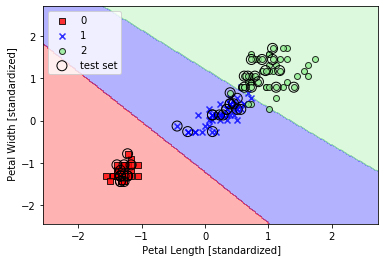

Accuracy: 0.98


In [9]:
X = iris.data[:, [2, 3]]
accuracy = train_smv_model(X=X,y=y,
                           feature_names=[' Petal Length', ' Petal Width'],
                           C=1.0, gamma=0.2, kernel='sigmoid', show_graph=True)

print('Accuracy: %.2f' % accuracy)

In [10]:
X = iris.data
data0 = []
for i in range(1,5):
    accur = train_smv_model(X=X,y=y,
                               C=1.0, gamma=i/10, kernel='linear')
    data0.append(['linear', accur, i/10, 1.0])

In [11]:
X = iris.data
data1 = []
for i in range(1,5):
    accur = train_smv_model(X=X,y=y,
                               C=1.0, gamma=i/10, kernel='rbf')
    data1.append(['rbf', accur, i/10, 1.0])

In [12]:
X = iris.data
data2 = []
for i in range(1,5):
    accur = train_smv_model(X=X,y=y,
                               C=1.0, gamma=i/10, kernel='poly')
    data2.append(['poly', accur, i/10, 1.0])

In [13]:
X = iris.data
data3 = []
for i in range(1,5):
    accur = train_smv_model(X=X,y=y,
                               C=1.0, gamma=i/10, kernel='sigmoid')
    data3.append(['sigmoid', accur, i/10, 1.0])

In [14]:
import pandas as pd

columns = ['kernel', 'accuracy', 'gamma', 'C_regularization parameter']

df = pd.DataFrame(np.array(data0),
                 columns=columns)
df

,kernel,accuracy,gamma,C_regularization parameter
0,linear,0.9777777777777777,0.1,1.0
1,linear,0.9777777777777777,0.2,1.0
2,linear,0.9777777777777777,0.3,1.0
3,linear,0.9777777777777777,0.4,1.0


In [15]:
df = pd.DataFrame(np.array(data1),
                 columns=columns)
df

,kernel,accuracy,gamma,C_regularization parameter
0,rbf,0.9777777777777777,0.1,1.0
1,rbf,0.9555555555555556,0.2,1.0
2,rbf,0.9777777777777777,0.3,1.0
3,rbf,0.9777777777777777,0.4,1.0


In [16]:
df = pd.DataFrame(np.array(data2),
                 columns=columns)
df

,kernel,accuracy,gamma,C_regularization parameter
0,poly,0.7555555555555555,0.1,1.0
1,poly,0.9111111111111111,0.2,1.0
2,poly,0.8888888888888888,0.3,1.0
3,poly,0.9555555555555556,0.4,1.0


In [17]:
df = pd.DataFrame(np.array(data3),
                 columns=columns)
df

,kernel,accuracy,gamma,C_regularization parameter
0,sigmoid,0.9777777777777777,0.1,1.0
1,sigmoid,0.9111111111111111,0.2,1.0
2,sigmoid,0.8444444444444444,0.3,1.0
3,sigmoid,0.8,0.4,1.0
